## Задание №1

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv', sep=',')
df.head(10).T

Наша задача заключается в определении качества красного вина на основе признаков, которые на это влияют. Наш целевой признак (target) - это 'quality', качество красного вина по неизвестной шкале (у нас присутствуют значения от 3 до 8). Соответственно, можем сделать вывод, что наш целевой признак является ранговым (порядковым). Исходя из этого можем рассматривать задачу и как классификацию, и как регрессию.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = df['quality']
X = df.drop('quality', axis=1)
X_new = scaler.fit_transform(X)
print(X_new[:5, :5])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_new,
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=2019)

Как и в предыдущей лабораторной работе будем рассматривать нашу задачу, как задачу классификации.

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=2019)
tree.fit(X_train, y_train)

In [ ]:
y_pred = tree.predict(X_valid)
tree.score(X_valid, y_valid)

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', feature_names=X.columns)
print(open('tree.dot').read()) 

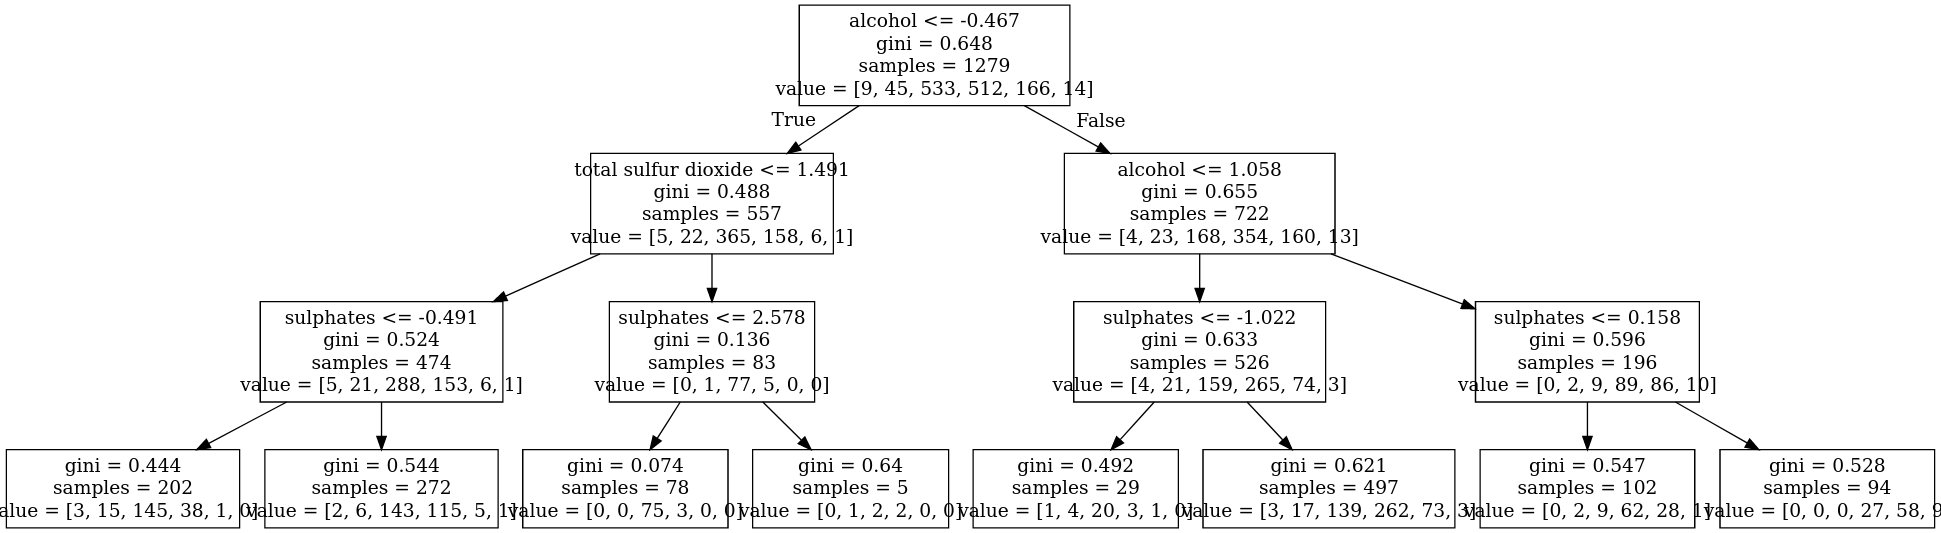

## Задание №2

In [ ]:
tree_params = {'min_samples_split': np.arange(50, 76)}

kf = KFold(n_splits = 5, shuffle = True, random_state = 2019)
tree_grid = GridSearchCV(tree, tree_params, cv=kf, scoring='accuracy')
tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.best_estimator_

In [ ]:
tree_grid.best_score_

In [ ]:
tree2 = DecisionTreeClassifier(min_samples_split=59, random_state=2019)
tree2_params = {'min_samples_leaf': np.arange(50, 76)}

tree2_grid = GridSearchCV(tree2, tree2_params, cv=kf, scoring='accuracy')
tree2_grid.fit(X_train, y_train)

In [ ]:
tree2_grid.best_estimator_

In [ ]:
tree2_grid.best_score_

In [ ]:
tree3 = DecisionTreeClassifier(min_samples_leaf=61, min_samples_split=59, random_state=2019)
tree3_params = {'max_depth': np.arange(2, 11)}

tree3_grid = GridSearchCV(tree3, tree3_params, cv=kf, scoring='accuracy')
tree3_grid.fit(X_train, y_train)

In [ ]:
tree3_grid.best_estimator_

In [ ]:
tree3_grid.best_score_

In [ ]:
tree4 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=61, min_samples_split=59, random_state=2019)
tree4_params = {'max_features': np.arange(1, 12)}

tree4_grid = GridSearchCV(tree4, tree4_params, cv=kf, scoring='accuracy')
tree4_grid.fit(X_train, y_train)

In [ ]:
tree4_grid.best_estimator_

In [ ]:
tree4_grid.best_score_

In [ ]:
plt.figure()
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15)) 


ax[0][0].plot(tree_params['min_samples_split'], tree_grid.cv_results_['mean_test_score']) 
ax[0][0].set_xlabel('min_samples_split')
ax[0][0].set_ylabel('mean accuracy')

ax[0][1].plot(tree2_params['min_samples_leaf'], tree2_grid.cv_results_['mean_test_score'])
ax[0][1].set_xlabel('min_samples_leaf')
ax[0][1].set_ylabel('mean accuracy')

ax[1][0].plot(tree3_params['max_depth'], tree3_grid.cv_results_['mean_test_score']) 
ax[1][0].set_xlabel('max_depth')
ax[1][0].set_ylabel('mean accuracy')

ax[1][1].plot(tree4_params['max_features'], tree4_grid.cv_results_['mean_test_score']) 
ax[1][1].set_xlabel('max_features')
ax[1][1].set_ylabel('mean accuracy')

Как видим по валидационным кривым, изменения гиперпараметров max_depth и max_features приводят к наиболее значительным изменениям в метрике.

In [ ]:
pd.DataFrame(tree4_grid.cv_results_).head().T

best_tree = tree4_grid.best_estimator_
y_pred = best_tree.predict(X_valid)
accuracy_score(y_valid, y_pred)

export_graphviz(best_tree, out_file='best_tree.dot', feature_names=X.columns)
print(open('best_tree.dot').read()) 

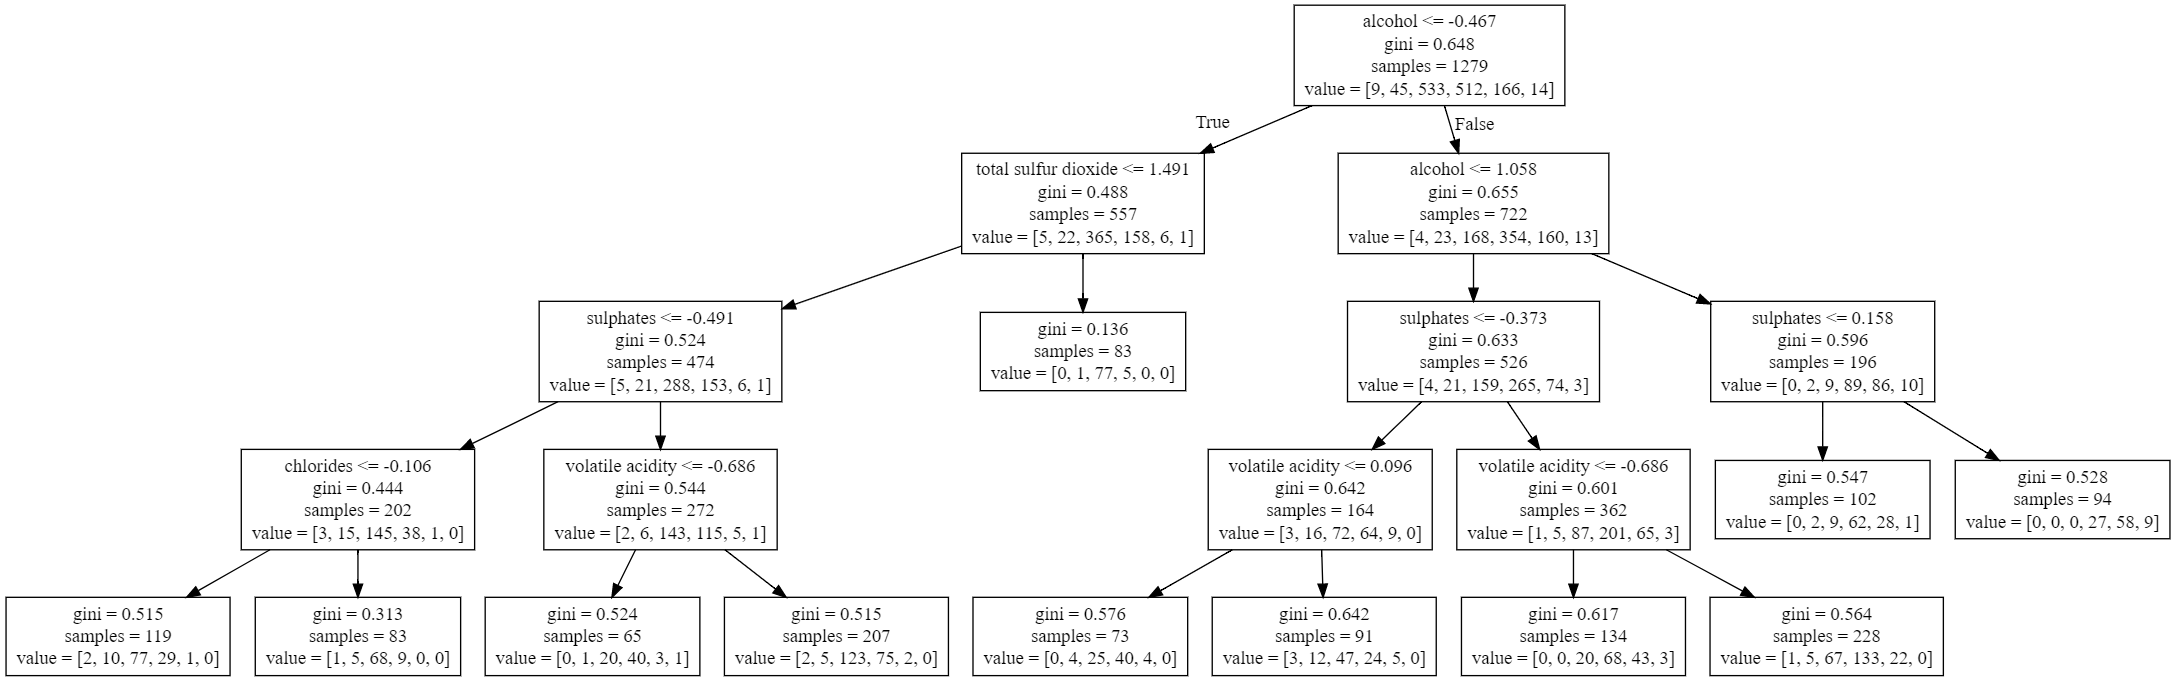

Мы осуществили кросс-валидацию с последовательным подбором оптимальных гиперпараметров. К сожалению, это редко даёт оптимальную точность, ведь при подборе каждого последующего гиперпараметра, мы опираемся на полученные ранее значения, совокупность которых может быть оптимальной с крайне малой вероятностью. Однако, в этом случае мы можем построить валидационные кривые, которые наглядно демонстрируют нам подбор гиперпараметров, а также это значительно быстрее, чем осуществлять подбор по всем гиперпараметрам сразу.

In [ ]:
tree0 = DecisionTreeClassifier(max_depth=3, random_state=2019)
tree0_params = {'max_depth': np.arange(2, 16), 'min_samples_split': np.arange(2, 10), 'min_samples_leaf': np.arange(1, 10), 'max_features': np.arange(1, 12)}

tree0_grid = GridSearchCV(tree0, tree0_params, cv=kf, scoring='accuracy')
tree0_grid.fit(X_train, y_train)

In [ ]:
tree0_grid.best_estimator_

In [ ]:
tree0_grid.best_score_

Действительно, даже с меньшими интервалами изменений гиперпараметров, чем при последовательном подборе, при подборе по всем гиперпараметрам сразу точность стала заметно выше, хоть и не кардинально.

In [ ]:
import matplotlib.pyplot as plt

features = {'f'+str(i+1):name for (i, name) in zip(range(len(df.columns)), df.columns)}

# Важность признаков

forest = DecisionTreeClassifier(min_samples_split=3, max_depth=11, max_features=10, random_state=2019)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features["f"+str(feature_indices[f])], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) for i in feature_indices]);

Мы оценили важность признаков по дереву с оптимальными гиперпараметрами, полученными при подборе всех гиперпараметров сразу. Видно, что значительно более важным, чем все остальные признаки, является содержание спирта в вине. Также, немаловажными признаками являются летучая кислотность и количество сульфатов.

## Задание №3

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)

accuracy_score(y_valid, y_pred)

In [ ]:
rf_params = {'n_estimators': [50, 100, 200, 300, 400]}
rf_grid = GridSearchCV(rf, 
                        rf_params, 
                        scoring='accuracy',
                        cv=kf)
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_estimator_

In [ ]:
rf_grid.best_score_

In [ ]:
rf2 = RandomForestClassifier(n_estimators=300, random_state=2019)
rf2_params = {'max_depth': np.arange(5, 16)}
rf2_grid = GridSearchCV(rf2, 
                        rf2_params, 
                        scoring='accuracy',
                        cv=kf)
rf2_grid.fit(X_train, y_train)

In [ ]:
rf2_grid.best_estimator_

In [ ]:
rf2_grid.best_score_

In [ ]:
rf3 = RandomForestClassifier(max_depth=13, n_estimators=300, random_state=2019)
rf3_params = {'min_samples_split': np.arange(2, 10)}
rf3_grid = GridSearchCV(rf3, 
                        rf3_params, 
                        scoring='accuracy',
                        cv=kf)
rf3_grid.fit(X_train, y_train)

In [ ]:
rf3_grid.best_estimator_

In [ ]:
rf3_grid.best_score_

In [ ]:
rf4 = RandomForestClassifier(max_depth=13, n_estimators=300, random_state=2019)
rf4_params = {'min_samples_leaf': np.arange(1, 10)}
rf4_grid = GridSearchCV(rf4, 
                        rf4_params, 
                        scoring='accuracy',
                        cv=kf)
rf4_grid.fit(X_train, y_train)

In [ ]:
rf4_grid.best_estimator_

In [ ]:
rf4_grid.best_score_

In [ ]:
rf5 = RandomForestClassifier(max_depth=13, n_estimators=300, random_state=2019)
rf5_params = {'max_features': np.arange(1, 12)}
rf5_grid = GridSearchCV(rf5, 
                        rf5_params, 
                        scoring='accuracy',
                        cv=kf)
rf5_grid.fit(X_train, y_train)

In [ ]:
rf5_grid.best_estimator_

In [ ]:
rf5_grid.best_score_

In [ ]:
plt.figure()
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15)) 


ax[0][0].plot(rf_params['n_estimators'], rf_grid.cv_results_['mean_test_score']) 
ax[0][0].set_xlabel('n_estimators')
ax[0][0].set_ylabel('mean accuracy')

ax[0][1].plot(rf2_params['max_depth'], rf2_grid.cv_results_['mean_test_score'])
ax[0][1].set_xlabel('max_depth')
ax[0][1].set_ylabel('mean accuracy')

ax[1][0].plot(rf3_params['min_samples_split'], rf3_grid.cv_results_['mean_test_score']) 
ax[1][0].set_xlabel('min_samples_split')
ax[1][0].set_ylabel('mean accuracy')

ax[1][1].plot(rf4_params['min_samples_leaf'], rf4_grid.cv_results_['mean_test_score']) 
ax[1][1].set_xlabel('min_samples_leaf')
ax[1][1].set_ylabel('mean accuracy')

ax[2][0].plot(rf5_params['max_features'], rf5_grid.cv_results_['mean_test_score']) 
ax[2][0].set_xlabel('max_features')
ax[2][0].set_ylabel('mean accuracy')

In [ ]:
import matplotlib.pyplot as plt

features = {'f'+str(i+1):name for (i, name) in zip(range(len(df.columns)), df.columns)}

# Важность признаков

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=13, max_features=3, n_estimators=300, random_state=2019)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features["f"+str(feature_indices[f])], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) for i in feature_indices]);

Как видим, как и для дерева, наиболее важным признаком является содержание спирта. Затем также идут те же признаки, что и для дерева (сульфаты и летучая кислотность), но в другом порядке, что в виду крайне малой разницы между их значимостью - незначительно.

При сравнении результатов 3 моделей, мы видим, что наивысшая полученная нами точность в обоих моделях (метод ближайших соседей и дерево решений) ≈ 0.62. Используя же случайный лес, даже не осуществляя кросс-валидацию с подбором всех гиперпараметров сразу (ведь это было бы весьма и весьма долго), мы получили точность, примерно равную 0.687. Исходя из этого, можем сделать вывод, что по крайней мере для нашей задачи этот метод даёт наилучший результат из трёх.